In [1]:
# 오피넷 접속 https://www.opinet.co.kr/user/main/mainView.do
# 서울시 구별 주유소 정보 받아오기

from selenium import webdriver
driver = webdriver.Chrome('../../driver/chromedriver.exe')
driver.get('https://www.opinet.co.kr/user/main/mainView.do')



In [2]:
# 크롬 실행 및 웹사이트 오픈 시간 기다리기
import time
time.sleep(5)

In [3]:
# 싼 주유소찾기 -> 지역별
xpath = '//*[@id="header"]/div/ul/li[1]/a'
temp = driver.find_element_by_xpath(xpath).click()
temp = driver.find_element_by_xpath(xpath).click() # 두번 클릭해줘야 함

xpath = '//*[@id="header"]/div/ul/li[1]/ul/li[1]/a/span'
temp = driver.find_element_by_xpath(xpath).click()
time.sleep(2)

In [4]:
# 유성구 리스트 박스에 해당하는 태그 찾기 -> copy xpath
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')

# option 태그로 리스트 찾기
gu_list = gu_list_raw.find_elements_by_tag_name('option')
gu_list

[<selenium.webdriver.remote.webelement.WebElement (session="a0a9d5b228a6007d4b29d75f2f9c22ed", element="2bd0a864-ba56-4d0a-862c-03af3a0835ae")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a0a9d5b228a6007d4b29d75f2f9c22ed", element="d2cb2d44-e434-47d1-8929-0280fff85feb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a0a9d5b228a6007d4b29d75f2f9c22ed", element="e9321817-a7f3-4c4f-92b5-d2a97d408d26")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a0a9d5b228a6007d4b29d75f2f9c22ed", element="f01af695-f351-4797-a8f9-ace2fccefada")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a0a9d5b228a6007d4b29d75f2f9c22ed", element="42745c9f-53ce-4692-b5d2-dff03005f1cd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a0a9d5b228a6007d4b29d75f2f9c22ed", element="560f22b7-dd7a-482e-af93-75d67b9558ed")>]

In [5]:
# gu_list에서 option 태그, text 가져오기
gu_names = [a.get_attribute('text') for a in gu_list]
gu_names

['시/군/구', '대덕구', '동구', '서구', '유성구', '중구']

In [6]:
gu_names[0]

'시/군/구'

In [7]:
# id selected1에 해당하는 element를 찾아서 '유성구'를 입력
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[4])

In [8]:
# 조회 버튼
xpath = '//*[@id="searRgSelect"]/span'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

time.sleep(1)
# 경유 버튼
xpath = '//*[@id="os_layer3"]/p/a'
element_sel_ku = driver.find_element_by_xpath(xpath).click()

# 엑셀 저장 -> C:\Users\kcs\Downloads
xpath = '//*[@id="glopopd_excel"]/span'
element_get_excel = driver.find_element_by_xpath(xpath).click()


In [9]:
# 구별로 엑셀파일 저장하기
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names[1:]):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    # 조회 버튼
    xpath = '//*[@id="searRgSelect"]/span'
    element_sel_gu = driver.find_element_by_xpath(xpath).click()

    time.sleep(1)
    # 경유 버튼
    xpath = '//*[@id="os_layer3"]/p/a'
    element_sel_ku = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    # 엑셀 저장 -> C:\Users\kcs\Downloads
    xpath = '//*[@id="glopopd_excel"]/span'
    element_get_excel = driver.find_element_by_xpath(xpath).click()    

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
#크롬 드라이버 종료
driver.close()

In [11]:
# C:\Users\kcs\Downloads 다운받은 폴더에서 엑셀파일을 working directory로 이동

import pandas as pd
from glob import glob
# glob : 파일 경로를 쉽게 접근


In [12]:
# glob를 이용하여 *표로 해당하는 파일을 필터링
glob('./지역_위치별*.xls')

['.\\지역_위치별(주유소) (1).xls',
 '.\\지역_위치별(주유소) (2).xls',
 '.\\지역_위치별(주유소) (3).xls',
 '.\\지역_위치별(주유소) (4).xls',
 '.\\지역_위치별(주유소).xls']

In [13]:
station_files = glob('./지역*.xls')
station_files

['.\\지역_위치별(주유소) (1).xls',
 '.\\지역_위치별(주유소) (2).xls',
 '.\\지역_위치별(주유소) (3).xls',
 '.\\지역_위치별(주유소) (4).xls',
 '.\\지역_위치별(주유소).xls']

In [14]:
tmp1 = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp1.append(tmp)
    
tmp1
pd.concat(tmp1)
    

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,대전광역시,아원주유소,대전 동구 계족로 326 (성남동),현대오일뱅크,042-625-2928,Y,-,1394,1224,900
1,대전광역시,대전셀프주유소,대전 동구 계족로 436 (용전동),SK에너지,042-673-8880,Y,-,1408,1208,-
2,대전광역시,현암주유소,대전 동구 동서대로 1494 (삼성동),GS칼텍스,042-634-3151,Y,-,1413,1213,-
3,대전광역시,(주)하늘셀프주유소,대전 동구 대전로 549,SK에너지,042-283-5151,Y,-,1413,1213,-
4,대전광역시,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,현대오일뱅크,010-2313-6643,Y,-,1413,1213,-
...,...,...,...,...,...,...,...,...,...,...
53,대전광역시,개나리주유소오일뱅크,대전 대덕구 오정로 53 (오정동),현대오일뱅크,042-631-4466,N,-,1489,1339,990
54,대전광역시,비전운수(주)산업단지주유소,대전 대덕구 산업단지로 107,GS칼텍스,042-935-5111,N,-,1499,1299,990
55,대전광역시,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),현대오일뱅크,042-933-0115,N,-,1499,1315,910
56,대전광역시,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),SK에너지,042-636-5151,N,-,1607,1418,-


In [15]:
# 구별 데이터 하나로 모으기
tmp_raw = []  # 빈 리스트
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp) # append로 데이터프레임을 리스트로 만듦   

station_raw = pd.concat(tmp_raw) # concat으로 데이터프레임 여러개를 하나로 만듦 
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,대전광역시,아원주유소,대전 동구 계족로 326 (성남동),현대오일뱅크,042-625-2928,Y,-,1394,1224,900
1,대전광역시,대전셀프주유소,대전 동구 계족로 436 (용전동),SK에너지,042-673-8880,Y,-,1408,1208,-
2,대전광역시,현암주유소,대전 동구 동서대로 1494 (삼성동),GS칼텍스,042-634-3151,Y,-,1413,1213,-
3,대전광역시,(주)하늘셀프주유소,대전 동구 대전로 549,SK에너지,042-283-5151,Y,-,1413,1213,-
4,대전광역시,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,현대오일뱅크,010-2313-6643,Y,-,1413,1213,-


In [16]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 57
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      238 non-null    object
 1   상호      238 non-null    object
 2   주소      238 non-null    object
 3   상표      238 non-null    object
 4   전화번호    238 non-null    object
 5   셀프여부    238 non-null    object
 6   고급휘발유   238 non-null    object
 7   휘발유     238 non-null    object
 8   경유      238 non-null    object
 9   실내등유    238 non-null    object
dtypes: object(10)
memory usage: 20.5+ KB


In [17]:
stations = pd.DataFrame({'주유소':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '경유':station_raw['경유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,주유소,주소,경유,셀프,상표
0,아원주유소,대전 동구 계족로 326 (성남동),1224,Y,현대오일뱅크
1,대전셀프주유소,대전 동구 계족로 436 (용전동),1208,Y,SK에너지
2,현암주유소,대전 동구 동서대로 1494 (삼성동),1213,Y,GS칼텍스
3,(주)하늘셀프주유소,대전 동구 대전로 549,1213,Y,SK에너지
4,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,1213,Y,현대오일뱅크


In [18]:
# 주소에서 구 이름만 추출
stations['구'] = [tmp.split()[1] for tmp in stations['주소']]
stations.head()

,주유소,주소,경유,셀프,상표,구
0,아원주유소,대전 동구 계족로 326 (성남동),1224,Y,현대오일뱅크,동구
1,대전셀프주유소,대전 동구 계족로 436 (용전동),1208,Y,SK에너지,동구
2,현암주유소,대전 동구 동서대로 1494 (삼성동),1213,Y,GS칼텍스,동구
3,(주)하늘셀프주유소,대전 동구 대전로 549,1213,Y,SK에너지,동구
4,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,1213,Y,현대오일뱅크,동구


In [19]:
# 구 이름 검사
stations['구'].unique()

array(['동구', '서구', '유성구', '중구', '광역시', '대덕구'], dtype=object)

In [20]:
# 구이름이 광역시로 되어 있는 부분 수정
stations[stations['구']=='광역시']

,주유소,주소,경유,셀프,상표,구
1,도서관주유소,대전 광역시 중구 보문산로 353,1184,Y,현대오일뱅크,광역시


In [21]:
stations.loc[11,'주유소']

11         참좋은주유소
11          황금주유소
11    (주)한진 대정주유소
11          중앙주유소
11       신탄진IC주유소
Name: 주유소, dtype: object

In [22]:
stations['구']=='광역시'

0     False
1     False
2     False
3     False
4     False
      ...  
53    False
54    False
55    False
56    False
57    False
Name: 구, Length: 238, dtype: bool

In [23]:
stations.loc[stations['구']=='광역시', '구'] = '중구'
stations['구'].unique()

array(['동구', '서구', '유성구', '중구', '대덕구'], dtype=object)

In [24]:
# 가격이 없는 경우 -로 표시된 경우 찾기
stations[stations['경유']=='-']

,주유소,주소,경유,셀프,상표,구
33,서울국제(주) 국제주유소,대전 동구 우암로 300 (가양동),-,N,SK에너지,동구
56,지에스칼텍스㈜ 덕명주유소,대전 유성구 현충원로 283 (덕명동),-,Y,GS칼텍스,유성구
57,(주)상아에너지,대전 유성구 계백로 476 (방동),-,N,GS칼텍스,유성구
58,계명주유소,대전 유성구 현충원로 492,-,N,S-OIL,유성구
40,금성주유소,대전 중구 동서대로 1183 (태평동),-,Y,S-OIL,중구
41,대웅에너지,대전 중구 대종로 557 (선화동),-,Y,현대오일뱅크,중구


In [25]:
# 가격 정보가 없는 주유소는 제외
stations = stations[stations['경유'] != '-']
stations.head()

,주유소,주소,경유,셀프,상표,구
0,아원주유소,대전 동구 계족로 326 (성남동),1224,Y,현대오일뱅크,동구
1,대전셀프주유소,대전 동구 계족로 436 (용전동),1208,Y,SK에너지,동구
2,현암주유소,대전 동구 동서대로 1494 (삼성동),1213,Y,GS칼텍스,동구
3,(주)하늘셀프주유소,대전 동구 대전로 549,1213,Y,SK에너지,동구
4,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,1213,Y,현대오일뱅크,동구


In [26]:
stations['경유'] = stations['경유'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 57
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소     232 non-null    object 
 1   주소      232 non-null    object 
 2   경유      232 non-null    float64
 3   셀프      232 non-null    object 
 4   상표      232 non-null    object 
 5   구       232 non-null    object 
dtypes: float64(1), object(5)
memory usage: 12.7+ KB


In [27]:
stations.reset_index(inplace=True)
stations.head()

,index,주유소,주소,경유,셀프,상표,구
0,0,아원주유소,대전 동구 계족로 326 (성남동),1224.0,Y,현대오일뱅크,동구
1,1,대전셀프주유소,대전 동구 계족로 436 (용전동),1208.0,Y,SK에너지,동구
2,2,현암주유소,대전 동구 동서대로 1494 (삼성동),1213.0,Y,GS칼텍스,동구
3,3,(주)하늘셀프주유소,대전 동구 대전로 549,1213.0,Y,SK에너지,동구
4,4,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,1213.0,Y,현대오일뱅크,동구


In [28]:
del stations['index']
stations.head()

,주유소,주소,경유,셀프,상표,구
0,아원주유소,대전 동구 계족로 326 (성남동),1224.0,Y,현대오일뱅크,동구
1,대전셀프주유소,대전 동구 계족로 436 (용전동),1208.0,Y,SK에너지,동구
2,현암주유소,대전 동구 동서대로 1494 (삼성동),1213.0,Y,GS칼텍스,동구
3,(주)하늘셀프주유소,대전 동구 대전로 549,1213.0,Y,SK에너지,동구
4,(주)동건에너지 삼호셀프주유소,대전 동구 중앙로 280,1213.0,Y,현대오일뱅크,동구


In [29]:
# boxplot으로 가격 비교

# matplotlib 한글화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts\malgun.ttf'
from matplotlib import font_manager, rc
if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

<AxesSubplot:title={'center':'경유'}, xlabel='셀프'>

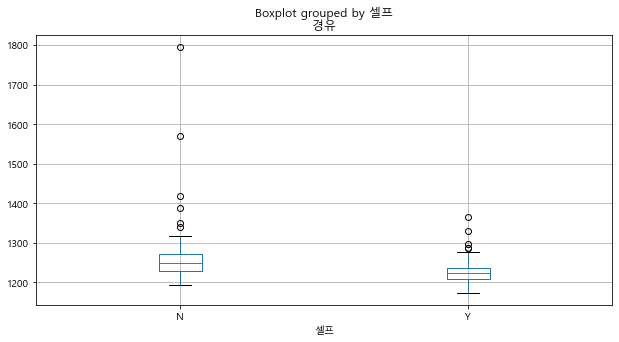

In [30]:
stations.boxplot(column='경유', by='셀프', figsize=(10,5))

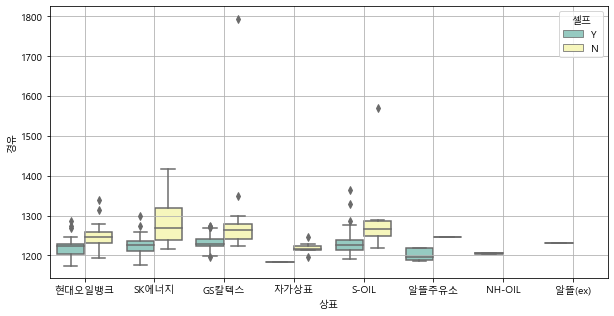

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x='상표',y='경유',hue='셀프', data=stations, palette='Set3')
plt.grid()
plt.show()

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\kcs\anaconda3\envs\study36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


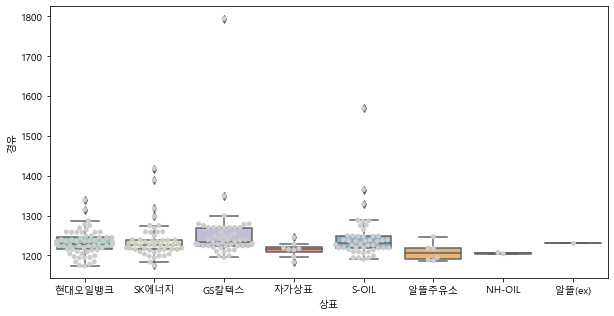

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='상표', y='경유', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='경유', data=stations, color='.8')
plt.show()

In [33]:
# 대전시 구별 경유 가격 확인하기
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [34]:
# 경유 가격을 기준으로 내림차순 정렬
stations.sort_values(by='경유', ascending=False).head(10)

,주유소,주소,경유,셀프,상표,구
231,한솔주유소,대전 대덕구 한밭대로 1036 (오정동),1794.0,N,GS칼텍스,대덕구
133,계룡주유소,대전 유성구 현충원로 177,1569.0,N,S-OIL,유성구
230,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),1418.0,N,SK에너지,대덕구
173,영광주유소,대전 중구 문화로 95 (유천동),1389.0,N,SK에너지,중구
172,목동주유소,대전 중구 동서대로 1385(목동),1365.0,Y,S-OIL,중구
211,한라주유소,대전 대덕구 오정로 65 (오정동),1349.0,N,GS칼텍스,대덕구
227,개나리주유소오일뱅크,대전 대덕구 오정로 53 (오정동),1339.0,N,현대오일뱅크,대덕구
77,삼정주유소,대전 서구 대덕대로 384 (만년동),1329.0,Y,S-OIL,서구
171,(주)안국에너지 용두동주유소,대전 중구 계룡로771번길 8 (용두동),1318.0,N,SK에너지,중구
229,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),1315.0,N,현대오일뱅크,대덕구


In [35]:
# 오름차순 정렬
stations.sort_values(by='경유', ascending=True).head()

,주유소,주소,경유,셀프,상표,구
78,(주)퍼스트오일,대전 유성구 현충원로 213 (갑동),1174.0,Y,현대오일뱅크,유성구
79,(주)학하 학하셀프주유소,대전 유성구 학하로 189 (복용동),1175.0,Y,SK에너지,유성구
134,(주)버드내주유소,대전 중구 계백로 1520 (유천동),1175.0,Y,현대오일뱅크,중구
80,㈜상익 유성주유소,대전 유성구 현충원로 342 (구암동),1178.0,Y,현대오일뱅크,유성구
156,진성주유소,대전 중구 대종로 122 (호동),1183.0,Y,SK에너지,중구


In [36]:
# pivot_table로 구별 가격 정보, 평균값으로 정리
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['경유'], aggfunc=np.mean)
gu_data.head()

,경유
구,
대덕구,1258.396552
동구,1230.484848
서구,1233.644444
유성구,1235.607143
중구,1224.575000


In [37]:
# 카카오지도 API를 이용하여 GPS 정보 가져오기
import requests

def getLatLng(address):
    result = ""
 
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
    rest_api_key = 'e136db6bd8eabd311ae2adbad82f7e3a'
    header = {'Authorization': 'KakaoAK ' + rest_api_key}
 
    r = requests.get(url, headers=header)
 
    if r.status_code == 200:
        result_address = r.json()["documents"][0]["address"]
        
        result = result_address["y"], result_address["x"]
    else:
        result = "ERROR[" + str(r.status_code) + "]"
    
    return result

geo_num = getLatLng('대전')
geo_num

('36.3505388992836', '127.38483484675')

In [38]:
# 튜플()을 리스트[]로 변환
list(geo_num)

# 리스트를 튜플로 변환
tuple(list(geo_num))

('36.3505388992836', '127.38483484675')

In [39]:
geo_num = list(geo_num)
geo_num

for i in range(len(geo_num)):
    geo_num[i] = float(geo_num[i])
    
geo_num

[36.3505388992836, 127.38483484675]

In [40]:
# 지도 json 데이터 읽기
geo_path = './skorea-municipalities-2018-topo-simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'Topology',
 'bbox': [124.60971767835858,
  33.11235576062581,
  131.8714666660104,
  38.61370930539022],
 'transform': {'scale': [7.261821605867886e-05, 5.501408558850002e-05],
  'translate': [124.60971767835858, 33.11235576062581]},
 'objects': {'skorea_municipalities_2018_geo': {'type': 'GeometryCollection',
   'geometries': [{'type': 'MultiPolygon',
     'arcs': [[[0, 1, 2, 3, 4, 5]]],
     'properties': {'name': '종로구',
      'base_year': '2018',
      'name_eng': 'Jongno-gu',
      'code': '11010'}},
    {'type': 'MultiPolygon',
     'arcs': [[[6, 7, 8, 9, -2, 10]]],
     'properties': {'name': '중구',
      'base_year': '2018',
      'name_eng': 'Jung-gu',
      'code': '11020'}},
    {'type': 'MultiPolygon',
     'arcs': [[[11, 12, 13, 14, 15, 16, -8]]],
     'properties': {'name': '용산구',
      'base_year': '2018',
      'name_eng': 'Yongsan-gu',
      'code': '11030'}},
    {'type': 'MultiPolygon',
     'arcs': [[[17, 18, -12, -7, 19]]],
     'properties': {'name': '성동구'

In [41]:
geo_str['objects']['skorea_municipalities_2018_geo']['geometries'][0]['properties']['name']

'종로구'

In [42]:
# folium으로 지도 표시
map = folium.Map(location=geo_num, zoom_start=13)
map

In [43]:
gu_data.index

Index(['대덕구', '동구', '서구', '유성구', '중구'], dtype='object', name='구')

In [44]:
# 경유 가격 상하위 10개 주유소 지도에 표시
oil_price_top10 = stations.sort_values(by='경유', ascending=False).head(10)
oil_price_top10

,주유소,주소,경유,셀프,상표,구
231,한솔주유소,대전 대덕구 한밭대로 1036 (오정동),1794.0,N,GS칼텍스,대덕구
133,계룡주유소,대전 유성구 현충원로 177,1569.0,N,S-OIL,유성구
230,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),1418.0,N,SK에너지,대덕구
173,영광주유소,대전 중구 문화로 95 (유천동),1389.0,N,SK에너지,중구
172,목동주유소,대전 중구 동서대로 1385(목동),1365.0,Y,S-OIL,중구
211,한라주유소,대전 대덕구 오정로 65 (오정동),1349.0,N,GS칼텍스,대덕구
227,개나리주유소오일뱅크,대전 대덕구 오정로 53 (오정동),1339.0,N,현대오일뱅크,대덕구
77,삼정주유소,대전 서구 대덕대로 384 (만년동),1329.0,Y,S-OIL,서구
171,(주)안국에너지 용두동주유소,대전 중구 계룡로771번길 8 (용두동),1318.0,N,SK에너지,중구
229,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),1315.0,N,현대오일뱅크,대덕구


In [45]:
oil_price_btm10 = stations.sort_values(by='경유', ascending=True).head(10)
oil_price_btm10

,주유소,주소,경유,셀프,상표,구
78,(주)퍼스트오일,대전 유성구 현충원로 213 (갑동),1174.0,Y,현대오일뱅크,유성구
79,(주)학하 학하셀프주유소,대전 유성구 학하로 189 (복용동),1175.0,Y,SK에너지,유성구
134,(주)버드내주유소,대전 중구 계백로 1520 (유천동),1175.0,Y,현대오일뱅크,중구
80,㈜상익 유성주유소,대전 유성구 현충원로 342 (구암동),1178.0,Y,현대오일뱅크,유성구
156,진성주유소,대전 중구 대종로 122 (호동),1183.0,Y,SK에너지,중구
136,천지인주유소,대전 중구 대종로 44 (옥계동),1183.0,Y,자가상표,중구
81,화암동셀프주유소,대전 유성구 대덕대로 804 (화암동),1184.0,Y,현대오일뱅크,유성구
135,도서관주유소,대전 광역시 중구 보문산로 353,1184.0,Y,현대오일뱅크,중구
33,(주)탄방주유소,대전 서구 유등로 659,1187.0,Y,알뜰주유소,서구
34,구봉산셀프주유소,대전 서구 구봉로 208,1189.0,Y,알뜰주유소,서구


In [46]:
# 카카오맵 api -> 주소로 gps 위도, 경도 불러오기
# try, except 구문을 이용해 에러를 방지
from tqdm import tqdm_notebook

lat = [] # 위도
lng = [] # 경도

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = getLatLng(tmp_add)
        
        lat.append(tmp_map[0])
        lng.append(tmp_map[1])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/10 [00:00<?, ?it/s]

,주유소,주소,경유,셀프,상표,구,lat,lng
231,한솔주유소,대전 대덕구 한밭대로 1036 (오정동),1794.0,N,GS칼텍스,대덕구,36.3579735770973,127.41377275483
133,계룡주유소,대전 유성구 현충원로 177,1569.0,N,S-OIL,유성구,36.3605359179477,127.291093697424
230,맘모스주유소,대전 대덕구 동서대로 1756 (비래동),1418.0,N,SK에너지,대덕구,36.3524247265068,127.443314061857
173,영광주유소,대전 중구 문화로 95 (유천동),1389.0,N,SK에너지,중구,36.312260309494,127.396278176724
172,목동주유소,대전 중구 동서대로 1385(목동),1365.0,Y,S-OIL,중구,36.3328102587334,127.411056558644
211,한라주유소,대전 대덕구 오정로 65 (오정동),1349.0,N,GS칼텍스,대덕구,36.3523294055892,127.410437907939
227,개나리주유소오일뱅크,대전 대덕구 오정로 53 (오정동),1339.0,N,현대오일뱅크,대덕구,36.3514845452811,127.411174761889
77,삼정주유소,대전 서구 대덕대로 384 (만년동),1329.0,Y,S-OIL,서구,36.3670310599529,127.380003664371
171,(주)안국에너지 용두동주유소,대전 중구 계룡로771번길 8 (용두동),1318.0,N,SK에너지,중구,36.3302119699468,127.403817697856
229,대덕산업단지관리공단주유사업소,대전 대덕구 문평동로 2 (문평동),1315.0,N,현대오일뱅크,대덕구,36.4454408097552,127.404371088158


In [47]:
# 카카오맵 api -> 주소로 gps 위도, 경도 불러오기
# try, except 구문을 이용해 에러를 방지
from tqdm import tqdm_notebook

lat = [] # 위도
lng = [] # 경도

for n in tqdm_notebook(oil_price_btm10.index):
    try:
        tmp_add = str(oil_price_btm10['주소'][n]).split('(')[0]
        tmp_map = getLatLng(tmp_add)
        
        lat.append(tmp_map[0])
        lng.append(tmp_map[1])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')
        
oil_price_btm10['lat'] = lat
oil_price_btm10['lng'] = lng
oil_price_btm10

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/10 [00:00<?, ?it/s]

,주유소,주소,경유,셀프,상표,구,lat,lng
78,(주)퍼스트오일,대전 유성구 현충원로 213 (갑동),1174.0,Y,현대오일뱅크,유성구,36.3603898959351,127.294563047671
79,(주)학하 학하셀프주유소,대전 유성구 학하로 189 (복용동),1175.0,Y,SK에너지,유성구,36.3448156900316,127.314155838355
134,(주)버드내주유소,대전 중구 계백로 1520 (유천동),1175.0,Y,현대오일뱅크,중구,36.3159971621366,127.388973635483
80,㈜상익 유성주유소,대전 유성구 현충원로 342 (구암동),1178.0,Y,현대오일뱅크,유성구,36.3590239923426,127.308731146586
156,진성주유소,대전 중구 대종로 122 (호동),1183.0,Y,SK에너지,중구,36.3034717275299,127.451126774807
136,천지인주유소,대전 중구 대종로 44 (옥계동),1183.0,Y,자가상표,중구,36.2976390446781,127.456061206924
81,화암동셀프주유소,대전 유성구 대덕대로 804 (화암동),1184.0,Y,현대오일뱅크,유성구,36.4017175003871,127.375055248434
135,도서관주유소,대전 광역시 중구 보문산로 353,1184.0,Y,현대오일뱅크,중구,36.3137580490301,127.415371148052
33,(주)탄방주유소,대전 서구 유등로 659,1187.0,Y,알뜰주유소,서구,36.3457645407824,127.401441909013
34,구봉산셀프주유소,대전 서구 구봉로 208,1189.0,Y,알뜰주유소,서구,36.2976060048189,127.345563163693


In [48]:
temp = ['lat','lng']
gps_mean = [] # 평균 위치
for i in temp:    
    oil_price_btm10[i] = oil_price_btm10[i].astype('float')
    gps_mean.append(np.mean(oil_price_btm10[i]))

oil_price_btm10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 78 to 34
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소     10 non-null     object 
 1   주소      10 non-null     object 
 2   경유      10 non-null     float64
 3   셀프      10 non-null     object 
 4   상표      10 non-null     object 
 5   구       10 non-null     object 
 6   lat     10 non-null     float64
 7   lng     10 non-null     float64
dtypes: float64(3), object(5)
memory usage: 1.0+ KB


In [49]:
gps_mean

[36.334018360767246, 127.37510431190181]

In [50]:
map = folium.Map(location=gps_mean, zoom_start=12.4)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                           radius=15, color='#CD3181',
                           fill_color = '#CD3181').add_to(map)
map